In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [36]:
dataset_path = '../data/'

pollen_test = pd.read_csv(dataset_path + 'pollen_test.csv')
pollen_train = pd.read_csv(dataset_path + 'pollen_train.csv')
pollen_type = pd.read_csv(dataset_path + 'pollen-type.csv')
submission_example = pd.read_csv(dataset_path + 'submission_example.csv')
weather_data = pd.read_csv(dataset_path + 'weather_data.csv')

In [37]:
weather_data.head()

,Unnamed: 0,location,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,0,КРАГУЈЕВАЦ,2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,КРАГУЈЕВАЦ,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,КРАГУЈЕВАЦ,2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,КРАГУЈЕВАЦ,2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,КРАГУЈЕВАЦ,2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
weather_data.drop(['Unnamed: 0', 'snow', 'wpgt', 'tsun', 'prcp', 'tmin', 'tmax'], axis=1, inplace=True)

In [39]:
# accumulate weather_data by date but not including the year
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['date'] = weather_data['date'].dt.strftime('%m-%d')
weather_data = weather_data.groupby('date').mean().reset_index()

In [40]:
weather_data.head()

,date,tavg,wdir,wspd,pres
0,01-01,1.914634,211.518519,6.870588,1024.089655
1,01-02,3.139024,192.357143,10.060000,1022.161290
2,01-03,2.276190,194.172414,12.116667,1019.648387
3,01-04,1.636585,184.285714,8.700000,1018.196552
4,01-05,3.682927,223.321429,11.185294,1014.234483


In [41]:
# Merge train_data and weather_data by date but not including the year

pollen_train['ds'] = pollen_train['date']
pollen_train['date'] = pd.to_datetime(pollen_train['date'])
pollen_train['date'] = pollen_train['date'].dt.strftime('%m-%d')
pollen_train = pollen_train.merge(weather_data, on='date', how='left')
pollen_train['date'] = pollen_train['ds']

In [42]:
pollen_train.drop(['ds'], axis=1, inplace=True)

In [43]:
pollen_train.head()

,Unnamed: 0,location,date,ACER,ALNUS,AMBROSIA,ARTEMISIA,BETULA,CANNABACEAE,CARPINUS,...,QUERCUS,RUMEX,SALIX,TILIA,ULMACEAE,URTICACEAE,tavg,wdir,wspd,pres
0,265,БЕОГРАД - НОВИ БЕОГРАД,2016-02-02,0,0,0,0,0,0,0,...,0,0,0,0,1,0,7.857778,187.750000,11.780000,1013.657500
1,266,БЕОГРАД - НОВИ БЕОГРАД,2016-02-03,0,1,0,0,0,0,0,...,0,0,0,0,8,0,8.338636,219.575758,11.986486,1013.441026
2,267,БЕОГРАД - НОВИ БЕОГРАД,2016-02-04,0,0,0,0,0,0,0,...,0,0,0,0,1,0,6.125000,226.529412,11.052632,1015.610811
3,268,БЕОГРАД - НОВИ БЕОГРАД,2016-02-05,0,2,0,0,0,0,0,...,0,0,0,0,0,0,4.931818,247.483871,11.327027,1017.530556
4,269,БЕОГРАД - НОВИ БЕОГРАД,2016-02-06,0,0,0,0,0,0,0,...,0,0,0,0,2,0,4.597619,206.100000,11.508333,1020.206061


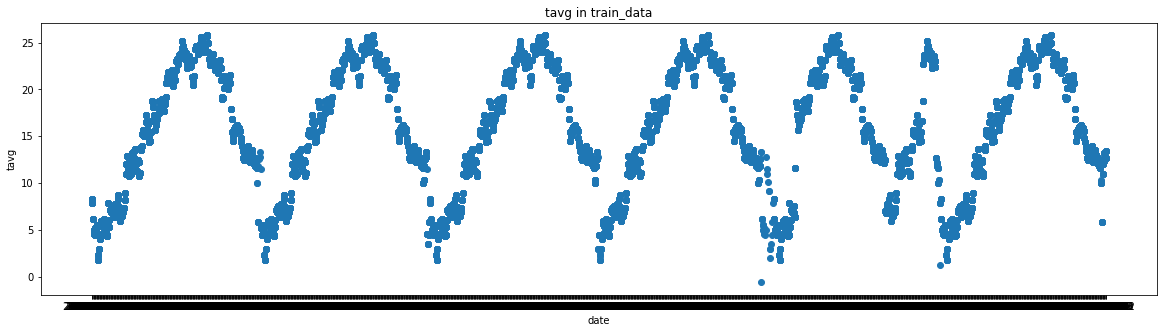

In [44]:
# plot tavg in train_data

plt.figure(figsize=(20, 5))
plt.scatter(pollen_train['date'], pollen_train['tavg'])
plt.title('tavg in train_data')
plt.xlabel('date')
plt.ylabel('tavg')
plt.show()

In [45]:
## Save train data csv

pollen_train.to_csv(dataset_path + 'pollen_and_weather_train.csv', index=False)